In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

## Data Collection and preprocessing

In [24]:
sonar_data=pd.read_csv("sonar-data.csv",header=None)

In [26]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [28]:
# number of rows and columns 
sonar_data.shape

(208, 61)

In [29]:
sonar_data.describe()  

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [32]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

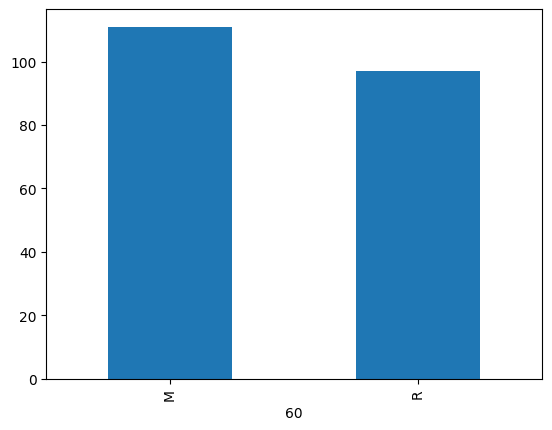

In [36]:
sonar_data[60].value_counts().plot(kind='bar')
plt.show()

In [38]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [47]:
sonar_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [49]:
sonar_data.duplicated().sum()

np.int64(0)

## Model Development

In [41]:
X=sonar_data.drop(columns=[60],axis='columns')
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [43]:
y=sonar_data[60]
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [56]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [58]:
X.shape,X_train.shape,X_test.shape

((208, 60), (166, 60), (42, 60))

In [59]:
y.shape,y_train.shape,y_test.shape

((208,), (166,), (42,))

In [123]:
model=LogisticRegression()

In [124]:
model.fit(X_train,y_train)

LogisticRegression()

In [70]:
model.classes_

array(['M', 'R'], dtype=object)

In [62]:
model.score(X_test,y_test)

0.8571428571428571

In [65]:
y_pred=model.predict(X_test)

In [77]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[21,  1],
       [ 5, 15]])

In [91]:
y_test.value_counts()

60
M    22
R    20
Name: count, dtype: int64

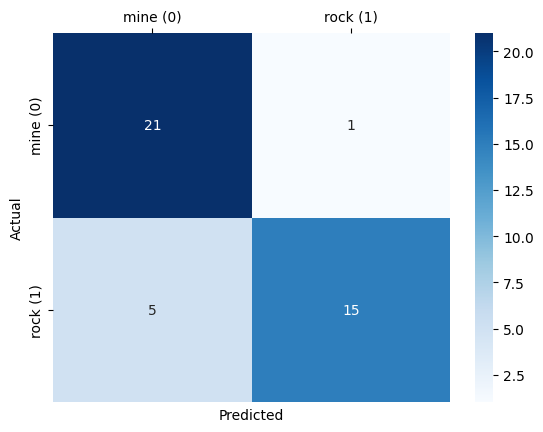

In [103]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['mine (0)','rock (1)'], yticklabels=['mine (0)', 'rock (1)'])
# tn, fp, fn, tp
plt.gca().xaxis.tick_top()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Make Prediction

In [110]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
input_data_as_numpy_array

array([0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664,
       0.146 , 0.2792, 0.3877, 0.4992, 0.4981, 0.4972, 0.5607, 0.7339,
       0.823 , 0.9173, 0.9975, 0.9911, 0.824 , 0.6498, 0.598 , 0.4862,
       0.315 , 0.1543, 0.0989, 0.0284, 0.1008, 0.2636, 0.2694, 0.293 ,
       0.2925, 0.3998, 0.366 , 0.3172, 0.4609, 0.4374, 0.182 , 0.3376,
       0.6202, 0.4448, 0.1863, 0.142 , 0.0589, 0.0576, 0.0672, 0.0269,
       0.0245, 0.019 , 0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152,
       0.0052, 0.0121, 0.0124, 0.0055])

In [111]:
input_data_as_numpy_array.shape

(60,)

In [108]:
# Reshape the data (1, -1) means 1 sample with multiple features
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped

array([[0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664,
        0.146 , 0.2792, 0.3877, 0.4992, 0.4981, 0.4972, 0.5607, 0.7339,
        0.823 , 0.9173, 0.9975, 0.9911, 0.824 , 0.6498, 0.598 , 0.4862,
        0.315 , 0.1543, 0.0989, 0.0284, 0.1008, 0.2636, 0.2694, 0.293 ,
        0.2925, 0.3998, 0.366 , 0.3172, 0.4609, 0.4374, 0.182 , 0.3376,
        0.6202, 0.4448, 0.1863, 0.142 , 0.0589, 0.0576, 0.0672, 0.0269,
        0.0245, 0.019 , 0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152,
        0.0052, 0.0121, 0.0124, 0.0055]])

In [ ]:
# reshape(1, -1)

#     What it means:
#         1 means one row.
#         -1 automatically calculates the number of columns needed to preserve the total number of elements in the array.

#  reshape(-1, 1)

#     What it means:
#         -1 calculates the number of rows automatically.
#         1 means one column.

In [112]:
input_data_reshaped.shape

(1, 60)

In [114]:
prediction = model.predict(input_data_reshaped)
prediction

array(['M'], dtype=object)

In [115]:
if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

The object is a mine


In [117]:
model.classes_

array(['M', 'R'], dtype=object)

In [116]:
model.predict_proba(input_data_reshaped)

array([[0.67527102, 0.32472898]])